# POTENCIALES EVOCADOS

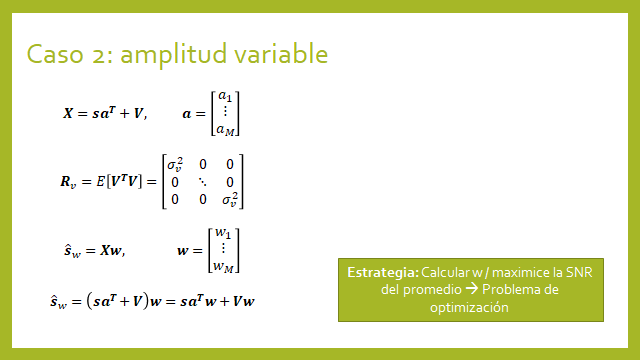

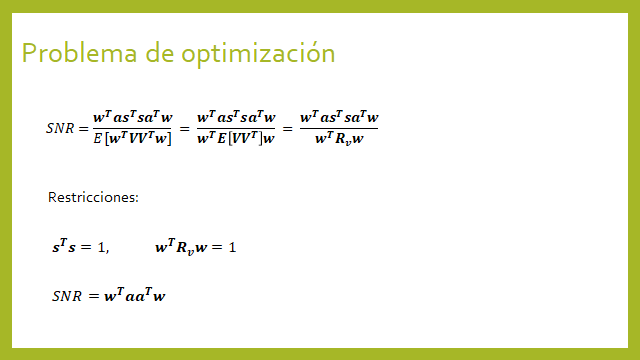

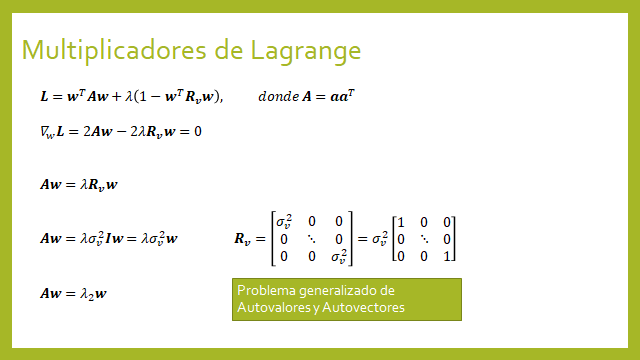

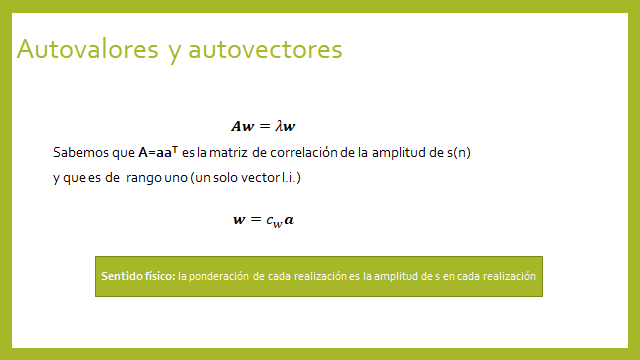

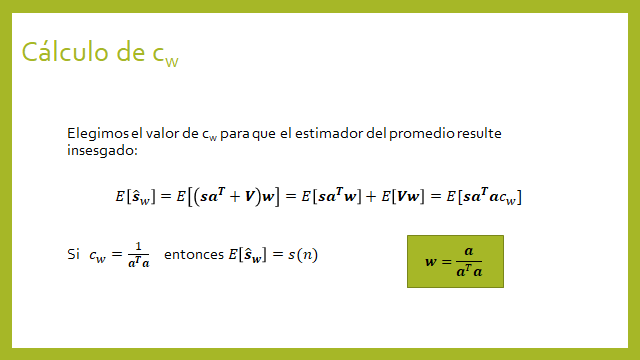

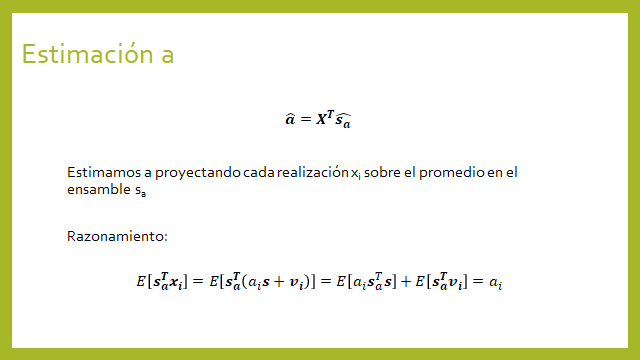

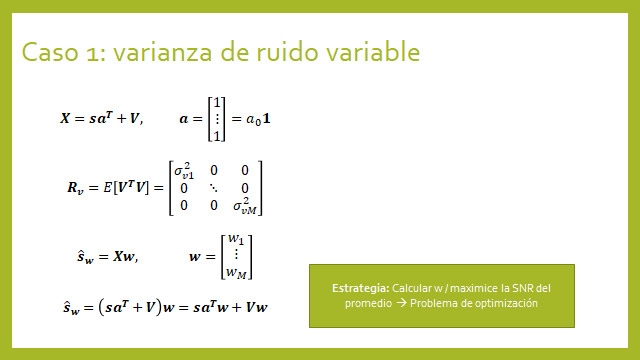

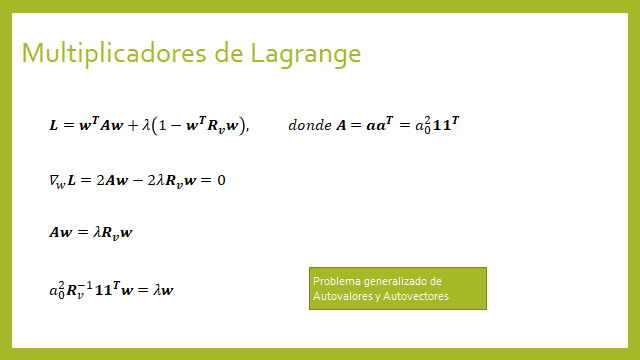

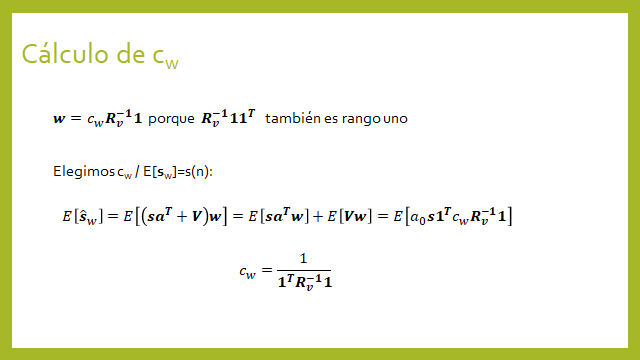

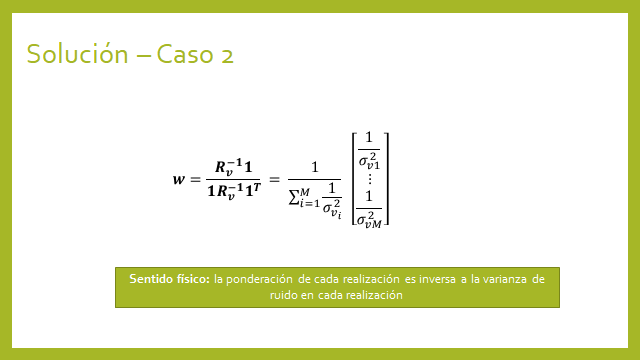

# Promedio inhomogéneo

Importo librerías que voy a utilizar:

In [1]:
# importo módulos a utilizar
import numpy as np
import matplotlib.pyplot as plt


### Creo funcion para generar el ensamble segun los supuestos inhomogeneos

In [2]:
def creoensamble(M, L, N, fs, sigma2_v):
# 
# M: Cantidad de Potenciales del ensamble
# D: Latencia antes del potencial
# N: Largo total de la señal con la latencia incluida
# fs: frecuencia de muestreo
# sigma2_v: Varianza del ruido
# 
  f = 5
  n = np.arange(0,(N-L)/fs,1/fs)
  pe = np.sin(2*np.pi*f*n) * (np.exp(-5*n))
  PE = np.concatenate((np.zeros(L), pe))
  S = np.outer(np.ones(M), PE)
  V = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(M, N))
  X = S + V

  return PE,X

  

## Caso 0: Promedio homogéneo

> Varianza de ruido y amplitud homogéneas

In [3]:
# Ensamble con varianzas variables, amplitudes de señal homogena
def creoensamble(M,L,N,fs, sigma2_v):
# 
# M: Cantidad de Potenciales del ensamble
# D: Latencia antes del potencial
# N: Largo total de la señal con la latencia incluida
# fs: frecuencia de muestreo
# sigma2_v: Varianza del ruido
# 
  f = 5
  Ts = 1/fs
  n = np.arange(0,(N-L)/fs,1/fs)
  EP = np.sin(2*np.pi*f*n) * (np.exp(-5*n))
  EP = np.concatenate((np.zeros(L), EP))
  S = np.outer(np.ones(M), EP)
  V = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(M, N))
  X = S + V
  # for i in range (M):
  #   varianza_v = np.random.rand(1)
  #   V = np.random.normal(loc=0.0, scale=np.sqrt(varianza_v), size=(M, 1))
  # X = S + V

  return EP,X

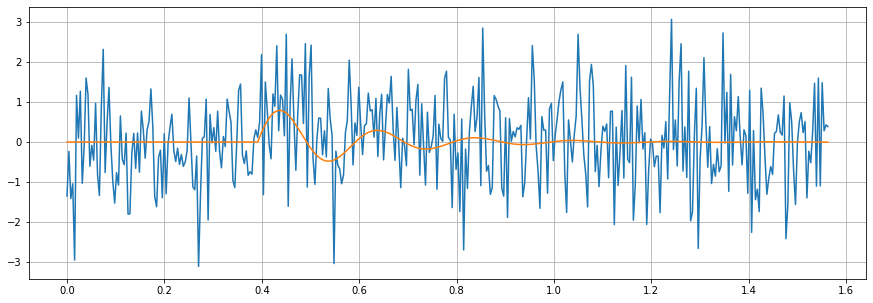

In [4]:
# Caso homogeneo
f = 5
M = 200
L = 100
N = 400
fs = 256
sigma2_v = 1

time_vec_h = np.linspace(0,N/fs,N)

EP_h, X_h = creoensamble(M, L, N, fs, sigma2_v)


plt.figure(figsize=(15,5))
plt.plot(time_vec_h, X_h[1])
plt.plot(time_vec_h, EP_h)
plt.grid()
plt.show()

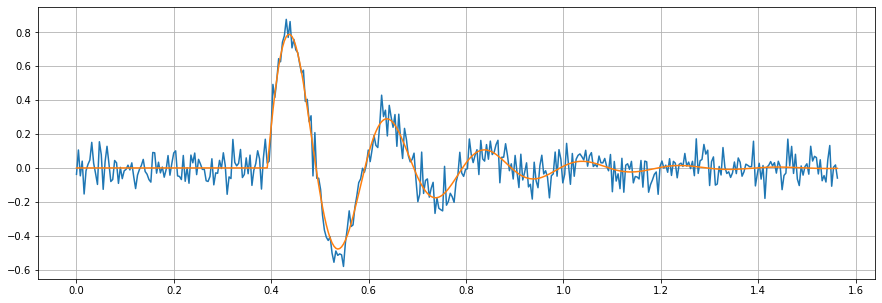

In [5]:
# Promediado ordinario
s_ordinary = np.zeros(N)
for i in np.arange(M):
  s_ordinary = X_h[i]/M + s_ordinary


plt.figure(figsize=(15,5))
plt.plot(time_vec_h, s_ordinary)
plt.plot(time_vec_h, EP_h)
plt.grid()
plt.show()


## Caso 1: V variable



> Varianza de ruido inhomogénea y amplitud de PE homogéneo



In [6]:
def creoensamble_variable(M = 200, L = 100, N = 400, fs = 256, sigma2_v=1):
  
  # M Cantidad de Potenciales del ensamble
  # D Latencia antes del potencial
  # N Largo total de la señal con la latencia incluida
  # fs frecuencia de muestreo
  # sigma2_v Varianza del ruido
  
  f = 5
  M = 200
  L = 100
  N = 400
  fs = 256
  sigma2_v = 1

  var_inh = np.random.normal(1,(1/2),M)
  n = np.arange(0,(N-L)/fs,1/fs)
  EP_inh = np.sin(2*np.pi*f*n) * (np.exp(-5*n))
  EP_inh = np.concatenate((np.zeros(L), EP_inh))
  S = np.outer(np.ones(M), EP_inh)
  V = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(M, N))

  for i in range(M):
    var_inh[i] = np.random.normal(1)
    V[i,:] = np.sqrt(abs(var_inh[i]))*np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(N))
  X = S + V
  return EP_inh, X, (var_inh)**2

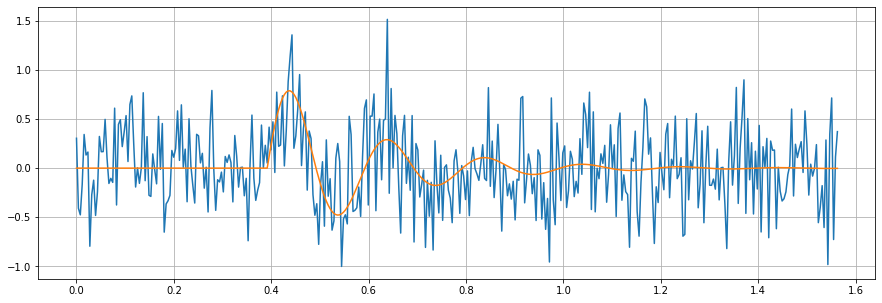

In [7]:
EP_inh, X_inh, var_inh = creoensamble_variable(M, L, N, fs, sigma2_v)
time_vec_inh = np.linspace(0,N/fs,N)

plt.figure(figsize=(15,5))
plt.plot(time_vec_inh, X_inh[1])
plt.plot(time_vec_inh, EP_inh)
plt.grid()
plt.show()


In [8]:
# EP, X = creoensamble(M, N, L,fs)
# fig, axs = plt.subplots(1, 1, figsize = (10, 7), tight_layout = True)
# axs.axhline(0, 0, 1, color='k')
# axs.plot(X[0])

# axs.axhline(-5, 0, 1, color='k')
# axs.plot(X[1] - 5)

# axs.axhline(-10, 0, 1, color='k')
# axs.plot(X[20] - 10)

# axs.axhline(0, 0, 1, color='k')
# axs.plot(X[0] - 5)

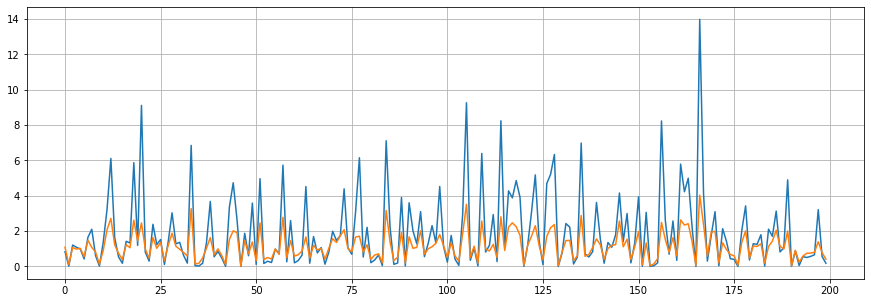

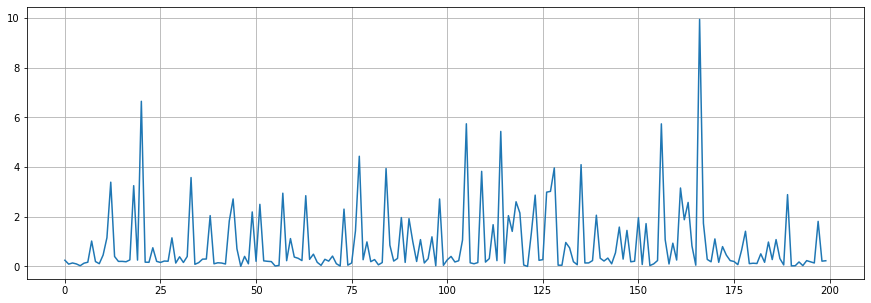

In [9]:
sigma_inh = np.zeros(M)
w_inh = np.zeros(M)

for i in range(M):
  sigma_inh[i] = np.var(X_inh[i][0:L])

for i in range(M):
  w_inh[i] = 1/sigma_inh[i]

w_inh = w_inh/np.sum(w_inh)

plt.figure(figsize=(15,5))
plt.plot(var_inh)
plt.plot(sigma_inh)
plt.grid()
plt.show()


plt.figure(figsize=(15,5))
plt.plot(np.abs(var_inh-sigma_inh))
plt.grid()
plt.show()

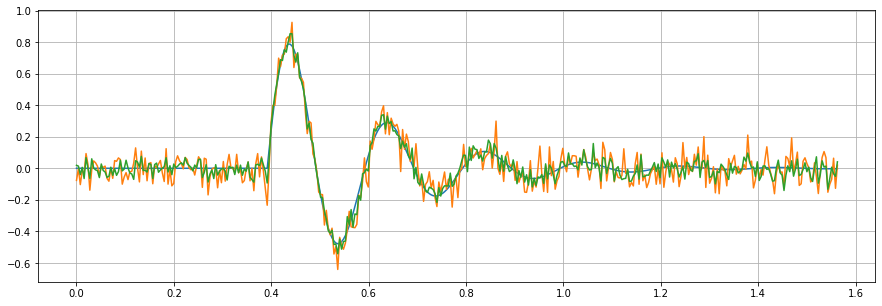

In [10]:
s2_inh = np.zeros(N)
for i in range(M):
  s2_inh = s2_inh + X_inh[i]*w_inh[i]

s_ordinary = np.zeros(N)
for i in range(M):
  s_ordinary = s_ordinary + X_inh[i]/M

plt.figure(figsize=(15,5))
plt.plot(time_vec_inh, EP_inh)
plt.plot(time_vec_inh, s_ordinary)
plt.plot(time_vec_inh, s2_inh)
plt.grid()
plt.show()


In [11]:
# Relacion señal-ruido
SNR_ordinary = np.var(s_ordinary[L:N])/np.var(s_ordinary[0:L])
print(SNR_ordinary)
SNR_inh = np.var(s2_inh[L:N])/np.var(s2_inh[0:L])
print(SNR_inh)

11.754517421637583
30.277682504585467


## Caso 2: PE variable

> Varianza de ruido homogénea y amplitud de PE inhomogénea



In [12]:
# PE inhomogeneo
def creoensamble_EP_inh(M = 200, L = 100, N = 400, fs = 256, sigma2_v=1):
  
  # M Cantidad de Potenciales del ensamble
  # D Latencia antes del potencial
  # N Largo total de la señal con la latencia incluida
  # fs frecuencia de muestreo
  # sigma2_v Varianza del ruido
  f = 5
  M = 200
  L = 100
  N = 400
  fs = 256
  sigma2_v = 1

  varianza_v = np.random.normal(1,0.5,M)
  n = np.arange(0,(N-L)/fs,1/fs)
  EP_ep_inh = np.sin(2*np.pi*f*n) * (np.exp(-5*n))
  EP_ep_inh = np.concatenate((np.zeros(L), EP_ep_inh))
  S = np.outer(np.ones(M), EP_ep_inh)
  V = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(M, N))
  amp_ep_inh = np.random.uniform(0.1,4,M)

  for i in range(M):
    S[i,:] = amp_ep_inh[i]*EP_ep_inh

    # var_ep_inh[i] = np.random.normal(1)
    # n[i] = np.arange(0,(N-L)/fs,1/fs)
    # EP_ep_inh[i,:] = np.sin(2*np.pi*f*n) * (np.exp(-5*n))
    # EP_ep_inh[i,:] = np.concatenate((np.zeros(L), pe(i,:)))
    # S[i,:] = np.outer(np.ones(M), amplituds[i]*EP_ep_inh)
    
  X_ep_inh = S + V
  return EP_ep_inh, X_ep_inh, amp_ep_inh

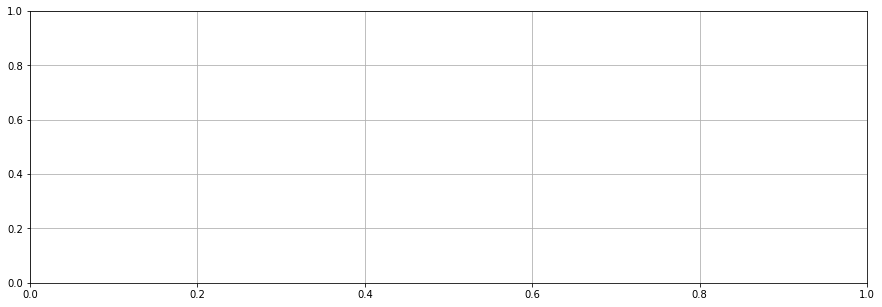

In [19]:
EP_ep_inh, X_ep_inh, amp_ep_inh = creoensamble_EP_inh(M, L, N, fs, sigma2_v)


plt.figure(figsize=(15,5))
# plt.plot(EP_ep_inh*amp_ep_inh[7])
# plt.plot(EP_ep_inh*amp_ep_inh[10])
plt.grid()
plt.show()

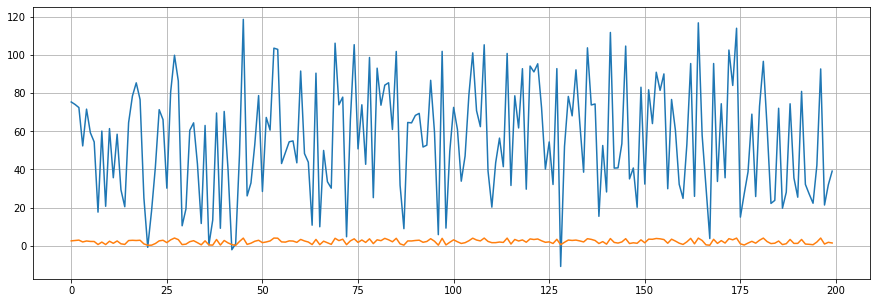

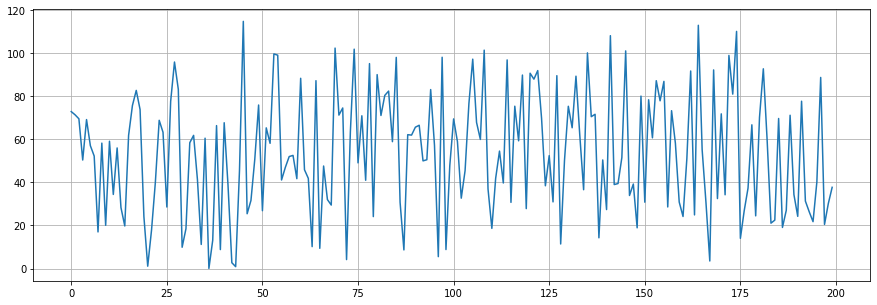

In [14]:
s_ordinary_ep_inh = np.zeros(N)
for i in np.arange(M):
  s_ordinary_ep_inh = X_ep_inh[i]/M + s_ordinary_ep_inh

amp_hat_ep_inh = np.zeros(M)

for i in np.arange(M):
  amp_hat_ep_inh[i] = np.inner(X_ep_inh[i],s_ordinary_ep_inh) #*0.04


plt.figure(figsize=(15,5))
plt.plot(amp_hat_ep_inh)
plt.plot(amp_ep_inh)
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(np.abs(amp_hat_ep_inh-amp_ep_inh))
plt.grid()
plt.show()


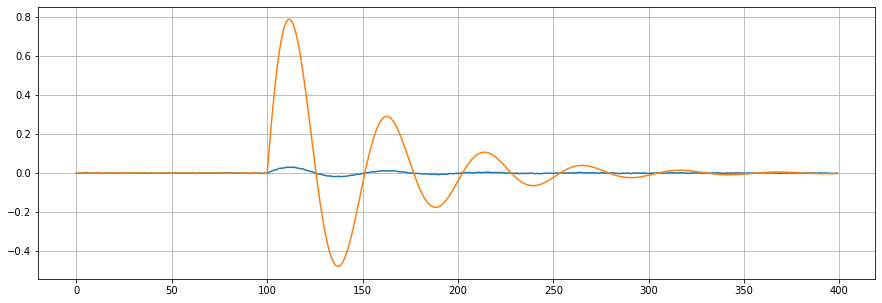

In [15]:
w_ep_inh = amp_hat_ep_inh/(np.inner(amp_hat_ep_inh,amp_hat_ep_inh))
s_hat_ep_inh = np.inner(X_ep_inh.T, w_ep_inh)

plt.figure(figsize=(15,5))
plt.plot(s_hat_ep_inh)
#plt.plot(s_ordinary)
plt.plot(EP_ep_inh)
plt.grid()
plt.show()

In [16]:
SNR_ordinary = np.var(s_ordinary_ep_inh[L:N])/np.var(s_ordinary_ep_inh[0:L])
print(SNR_ordinary)
SNR_ep_inh = np.var(s_hat_ep_inh[L:N])/np.var(s_hat_ep_inh[0:L])
print(SNR_ep_inh)

36.619538187817135
40.84802446209745


## Caso 3: V variable



> Varianza de ruido  y amplitud de PE inhomogéneas 



In [17]:
def creoensamble_ep_var_inh(M = 200, L = 100, N = 400, fs = 256, sigma2_v=1):
  
  # M Cantidad de Potenciales del ensamble
  # D Latencia antes del potencial
  # N Largo total de la señal con la latencia incluida
  # fs frecuencia de muestreo
  # sigma2_v Varianza del ruido
  f = 5
  M = 200
  L = 100
  N = 400
  fs = 256
  sigma2_v = 1
  var_ep_var_inh = np.random.normal(1,0.5,M)
  n = np.arange(0,(N-L)/fs,1/fs)
  EP_ep_var_inh = np.sin(2*np.pi*f*n) * (np.exp(-5*n))
  EP_ep_var_inh = np.concatenate((np.zeros(L), EP_ep_var_inh))
  S = np.outer(np.ones(M), EP_ep_var_inh)
  V = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(M, N))
  amp_ep_var_inh = np.random.uniform(0.1,4,M)
  for i in range(M):
    var_ep_var_inh[i] = np.random.normal(1)
    V[i,:] = np.sqrt(abs(var_ep_var_inh[i]))*np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(N))
    S[i,:] = amp_ep_var_inh[i]*EP_ep_var_inh
  X_ep_var_inh = S + V
  return EP_ep_var_inh, X_ep_var_inh, (var_ep_var_inh)**2, amp_ep_var_inh 

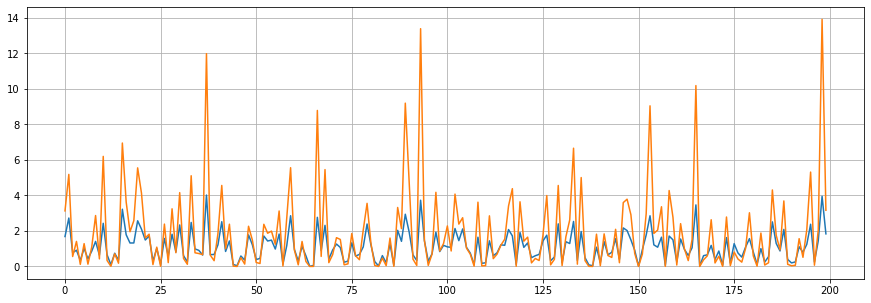

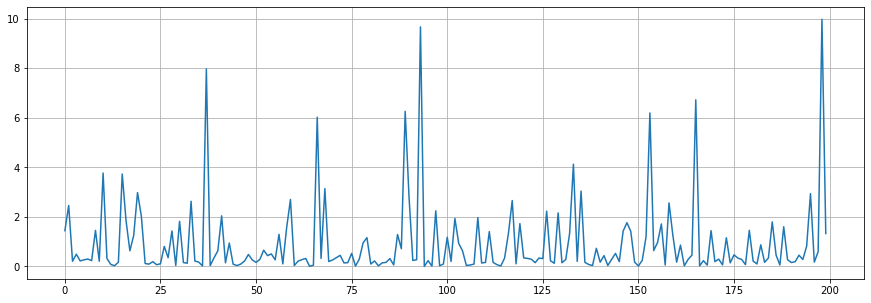

In [18]:
EP_ep_var_inh, X_ep_var_inh, var_ep_var_inh, amp_ep_var_inh = creoensamble_ep_var_inh(M, L, N, fs, sigma2_v)

sigma_ep_var_inh = np.zeros(M)
w_ep_var_inh = np.zeros(M)

for i in range(M):
  sigma_ep_var_inh[i] = np.var(X_ep_var_inh[i][0:L])

for i in range(M):
  w_ep_var_inh[i] = 1/sigma_ep_var_inh[i]

w_ep_var_inh = w_ep_var_inh/np.sum(w_ep_var_inh)

plt.figure(figsize=(15,5))
plt.plot(sigma_ep_var_inh)
plt.plot(var_ep_var_inh)
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(np.abs(sigma_ep_var_inh-var_ep_var_inh))
plt.grid()
plt.show()